In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/loan_data(1).csv"
df = pd.read_csv(path)

In [ ]:
print("Raw data shape:", df.shape)   #Basic data structure and target column inspection

print("\nColumn dtypes:")
print(df.dtypes)

print("\nFirst 5 rows:")
display(df.head())

print("\nTarget variable distribution (loan_status):")
if "loan_status" in df.columns:
    print(df["loan_status"].value_counts(dropna=False))
    print("\nProportion:")
    print(df["loan_status"].value_counts(normalize=True, dropna=False))


Raw data shape: (45000, 14)

Column dtypes:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

First 5 rows:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1



Target variable distribution (loan_status):
loan_status
0    35000
1    10000
Name: count, dtype: int64

Proportion:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


In [ ]:
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(r"[^a-z0-9]+", "_", regex=True)
    .str.strip("_")
)    #Column naming standardization and deduplication

In [ ]:
df.drop_duplicates(inplace=True)#Delete completely duplicate rows

In [ ]:
null_ratio = df.isna().mean()#Calculate the proportion of missing values ​​in each column.
drop_cols = null_ratio[null_ratio > 0.40].index.tolist()
df.drop(columns=drop_cols, inplace=True)

In [ ]:
null_ratio = df.isna().mean().sort_values(ascending=False)
print("Missing value ratio by column:")
display(null_ratio)

non_zero_null = null_ratio[null_ratio > 0]
if not non_zero_null.empty:
    non_zero_null.plot(kind="bar", figsize=(10,4))
    plt.ylabel("Missing ratio")
    plt.title("Missing value ratio by feature")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values in any column.")

drop_cols = null_ratio[null_ratio > 0.40].index.tolist()
print("\nColumns with > 40% missing values to drop:")
print(drop_cols)

df.drop(columns=drop_cols, inplace=True)
print("\nShape after dropping high-missing columns:", df.shape)



Missing value ratio by column:


,0
loan_status,0.0
person_age,0.0
person_income,0.0
person_emp_exp,0.0
loan_amnt,0.0
loan_int_rate,0.0
loan_percent_income,0.0
cb_person_cred_hist_length,0.0
credit_score,0.0
previous_loan_defaults_on_file,0.0


No missing values in any column.

Columns with > 40% missing values to drop:
[]

Shape after dropping high-missing columns: (45000, 25)


In [ ]:
target_col = "loan_status"#Standardization of target variables
if target_col in df.columns:

    df[target_col] = (
        df[target_col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"1":1, "0":0, "yes":1, "no":0, "true":1, "false":0}) # Map the binary categorical variable "Yes/No" to the numerical values ​​1/0
        .fillna(df[target_col].apply(pd.to_numeric, errors="coerce"))
    )

In [ ]:
df[target_col] = df[target_col].fillna(0).astype(int)

In [ ]:
num_cols_auto = df.select_dtypes(include=[np.number]).columns.tolist()#Automatically collect all numerical feature column names.
cat_cols_auto = df.select_dtypes(exclude=[np.number]).columns.tolist()#Automatically collect all non-numerical feature column names.

In [ ]:
likely_cats = [
    "person_gender","person_education","person_home_ownership",
    "loan_intent","previous_loan_defaults_on_file"
]
for c in likely_cats:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.lower()

        if c == "previous_loan_defaults_on_file":
            df[c] = df[c].map({"yes":1, "no":0}).fillna(df[c])

            if not np.issubdtype(df[c].dtype, np.number):
                df[c] = pd.to_numeric(df[c], errors="coerce")#Categorical and numerical feature normalization

In [ ]:
likely_nums = [
    "person_age","person_income","person_emp_exp","loan_amnt","loan_int_rate",
    "loan_percent_income","cb_person_cred_hist_length","credit_score"
]
for c in likely_nums:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")


=== person_age statistics ===


,person_age
count,45000.000000
mean,27.748156
std,5.909318
min,20.000000
25%,24.000000
50%,26.000000
75%,30.000000
max,94.000000


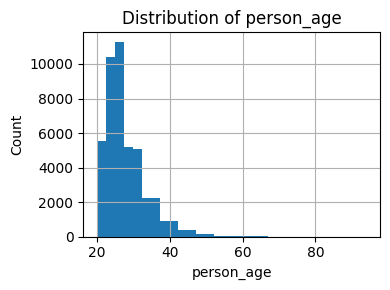


=== person_income statistics ===


,person_income
count,4.500000e+04
mean,8.031905e+04
std,8.042250e+04
min,8.000000e+03
25%,4.720400e+04
50%,6.704800e+04
75%,9.578925e+04
max,7.200766e+06


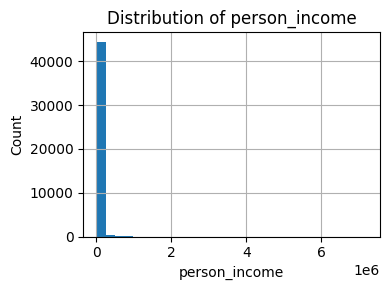


=== loan_amnt statistics ===


,loan_amnt
count,45000.000000
mean,9583.157556
std,6314.886691
min,500.000000
25%,5000.000000
50%,8000.000000
75%,12237.250000
max,35000.000000


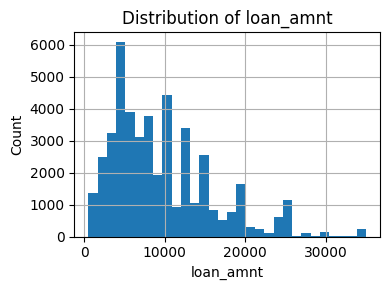


=== loan_int_rate statistics ===


,loan_int_rate
count,45000.000000
mean,11.006606
std,2.978808
min,5.420000
25%,8.590000
50%,11.010000
75%,12.990000
max,20.000000


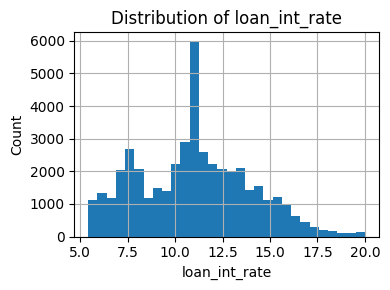


=== loan_percent_income statistics ===


,loan_percent_income
count,45000.000000
mean,0.139725
std,0.087212
min,0.000000
25%,0.070000
50%,0.120000
75%,0.190000
max,0.660000


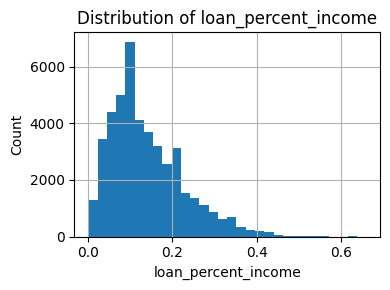


=== credit_score statistics ===


,credit_score
count,45000.000000
mean,632.608756
std,50.435865
min,390.000000
25%,601.000000
50%,640.000000
75%,670.000000
max,850.000000


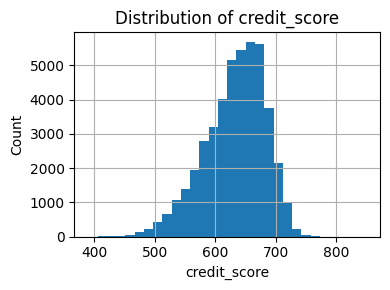

In [ ]:
num_cols_overview = [
    "person_age", "person_income", "loan_amnt",
    "loan_int_rate", "loan_percent_income", "credit_score"
]#Numerical distribution overview and visualization

for col in num_cols_overview:
    if col in df.columns:
        print(f"\n=== {col} statistics ===")
        display(df[col].describe())

        df[col].hist(bins=30, figsize=(4,3))
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()


In [ ]:
bounds = {
    "person_age": (18, 100),
    "person_emp_exp": (0, 60),
    "person_income": (0, None),
    "loan_amnt": (0, None),
    "loan_int_rate": (0, 40),
    "loan_percent_income": (0, 1.5),
    "cb_person_cred_hist_length": (0, 50),
    "credit_score": (300, 850)
}#Reasonable value range constraints
for c, (lo, hi) in bounds.items():
    if c in df.columns:
        if lo is not None:
            df.loc[df[c] < lo, c] = np.nan
        if hi is not None:
            df.loc[df[c] > hi, c] = np.nan

Missing value imputation

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
for c in num_cols:
    if c != target_col:
        med = df[c].median()
        df[c] = df[c].fillna(med)

In [ ]:
for c in cat_cols:
    df[c] = df[c].fillna("unknown")


One-Hot encoding and deletion of columns with no information

In [ ]:
cols_to_encode = [c for c in cat_cols if c != target_col]
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)


In [ ]:
nunique = df.nunique()
const_cols = nunique[nunique <= 1].index.tolist()
if const_cols:
    df.drop(columns=const_cols, inplace=True)


Highly relevant feature screening

In [ ]:
corr = df.corr(numeric_only=True).abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.98)]
if to_drop_corr:
    #
    to_drop_corr = [c for c in to_drop_corr if c != target_col]
    df.drop(columns=to_drop_corr, inplace=True, errors="ignore")

DTI and Interest Rate * Credit Score

In [ ]:
if {"loan_amnt","person_income"}.issubset(df.columns):
    df["feat_dti_approx"] = (df["loan_amnt"] / (df["person_income"] + 1e-9)).clip(0, 2)

In [ ]:
if {"loan_int_rate","credit_score"}.issubset(df.columns):
    df["feat_rate_x_score"] = df["loan_int_rate"] * df["credit_score"]

Column order adjustment and result saving

In [ ]:
cols = df.columns.tolist()
if target_col in cols:
    cols = [target_col] + [c for c in cols if c != target_col]
    df = df[cols]


In [ ]:
clean_path = "/content/loan_data_clean.csv"
df.to_csv(clean_path, index=False)

print("Clean data shape:", df.shape)
print("Saved to:", clean_path)
print(df.head(10))



Clean data shape: (45000, 25)
Saved to: /content/loan_data_clean.csv
   loan_status  person_age  person_income  person_emp_exp  loan_amnt  \
0            1        22.0        71948.0             0.0    35000.0   
1            0        21.0        12282.0             0.0     1000.0   
2            1        25.0        12438.0             3.0     5500.0   
3            1        23.0        79753.0             0.0    35000.0   
4            1        24.0        66135.0             1.0    35000.0   
5            1        21.0        12951.0             0.0     2500.0   
6            1        26.0        93471.0             1.0    35000.0   
7            1        24.0        95550.0             5.0    35000.0   
8            1        24.0       100684.0             3.0    35000.0   
9            1        21.0        12739.0             0.0     1600.0   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          16.02                 0.49                         3.0   
